In [1]:
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 读入图像
im = cv2.imread('image/my.jpg') #numpy数组

# 打印图像尺寸
h, w = im.shape[:2]
print h, w

# 保存原jpg格式的图像为png格式图像
cv2.imwrite('image/my1.png',im)

1920 1440


True

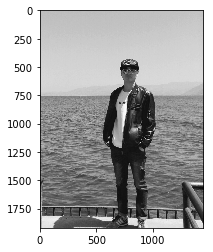

In [3]:
# 颜色空间转化

# 读入图像
im = cv2.imread('image/my.jpg') #numpy数组
# create a grayscale version
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
fig = plt.figure()
plt.gray()
plt.imshow(gray)   

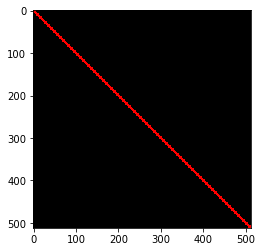

In [6]:
# 在图像上画直线
# Create a black image 
img=np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5) #起点左上角(0,0),终点右下角(511,511)  ,(255,0,0)BGR
plt.imshow(img)

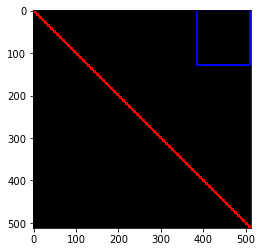

In [8]:
# 矩形
cv2.rectangle(img,(384,0),(510,128),(0,0,255),3)
plt.imshow(img)

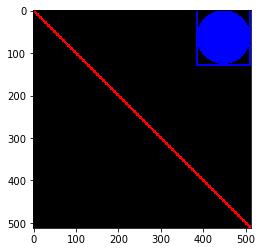

In [9]:
# 圆形
cv2.circle(img,(447,63), 63, (0,0,255), -1) #中心点坐标和半径大小
plt.imshow(img)

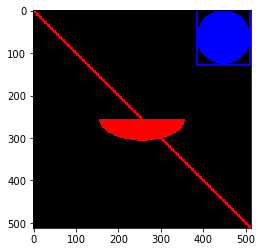

In [10]:
# 椭圆
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1) # 中心点的位置坐标，长轴和短轴的长度，椭圆沿逆时针方向旋转的角度
plt.imshow(img)

In [15]:
# 图像的基础操作
im = cv2.imread('image/my.jpg') #numpy数组
# 打印图像尺寸
print im.shape # 行，列，通道
print im.size # 像素数目
print im.dtype # 数据类型

(1920L, 1440L, 3L)
8294400
uint8


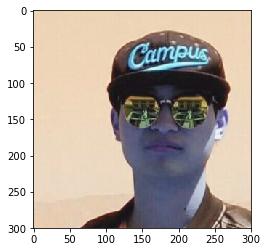

In [18]:
# ROI区域
im = cv2.imread('image/my.jpg') #numpy数组
roi = im[400:700,600:900] # 通过索引，选取位置
plt.imshow(roi)

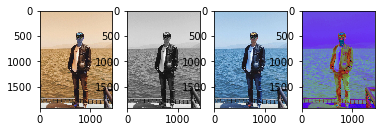

In [24]:
# 颜色空间转换

im = cv2.imread('image/my.jpg') #numpy数组
im2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im3 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im4 = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
plt.figure()
plt.subplot(141)
plt.imshow(im)
plt.subplot(142)
plt.imshow(im2)
plt.subplot(143)
plt.imshow(im3)
plt.subplot(144)
plt.imshow(im4)

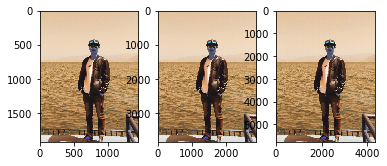

In [26]:
# 几何变换

# 扩展缩放

img=cv2.imread('image/my.jpg')
# 下面的 None 本应该是输出图像的尺寸，但是因为后边我们设置了缩放因子
# 因此这里为 None
res1=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
#OR
# 这里呢，我们直接设置输出图像的尺寸，所以不用设置缩放因子
height,width=img.shape[:2]
res2=cv2.resize(img,(3*width,3*height),interpolation=cv2.INTER_CUBIC)
plt.figure()
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(res1)
plt.subplot(133)
plt.imshow(res2)


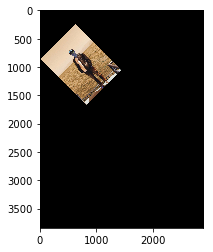

In [28]:
# 旋转

img=cv2.imread('image/my.jpg')
rows,cols=img.shape[:2]
# 这里的第一个参数为旋转中心，第二个为旋转角度，第三个为旋转后的缩放因子
# 可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
M=cv2.getRotationMatrix2D((cols/2,rows/2),45,0.6)
# 第三个参数是输出图像的尺寸中心
dst=cv2.warpAffine(img,M,(2*cols,2*rows))
plt.imshow(dst)

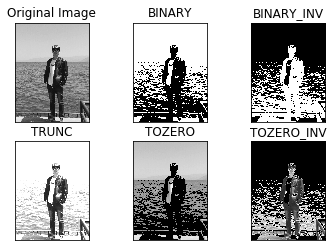

In [32]:
# 图像阈值
img=cv2.imread('image/my.jpg',0)
ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in xrange(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

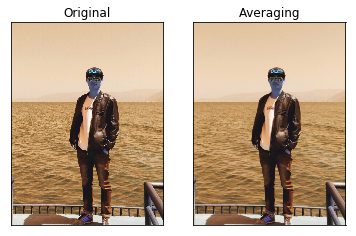

In [33]:
# 2D卷积
# 使用平均滤波器
img = cv2.imread('image/my.jpg')
kernel = np.ones((5,5),np.float32)/25
#cv.Filter2D(src, dst, kernel, anchor=(-1, -1))
#ddepth –desired depth of the destination image;
#if it is negative, it will be the same as src.depth();
#the following combinations of src.depth() and ddepth are supported:
#src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
#src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_64F, ddepth = -1/CV_64F
#when ddepth=-1, the output image will have the same depth as the source.
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

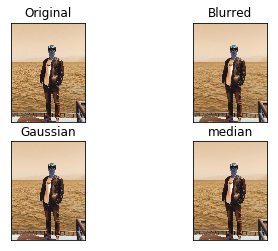

In [34]:
# 图像模糊（图像平滑）

img = cv2.imread('image/my.jpg')
blur = cv2.blur(img,(5,5))
plt.subplot(221)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

# 平均模糊
plt.subplot(222)
plt.imshow(blur)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])


#0 是指根据窗口大小（ 5,5 ）来计算高斯函数标准差
Gaussian = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(223)
plt.imshow(Gaussian)
plt.title('Gaussian')
plt.xticks([]), plt.yticks([])

# 中值模糊
median = cv2.medianBlur(img,5)
plt.subplot(224)
plt.imshow(median)
plt.title('median')
plt.xticks([]), plt.yticks([])

plt.show()